# Aufgabenblatt 01

## Aufgabe 1
a) Gegeben sind drei verschiedene Regressionsgeraden (rot-gestrichelte Linie). Bestimmen Sie für jede der Geraden A, B und C die beiden Parameter $\beta_0$ und $\beta_1$ durch Ablesen aus der Grafik.

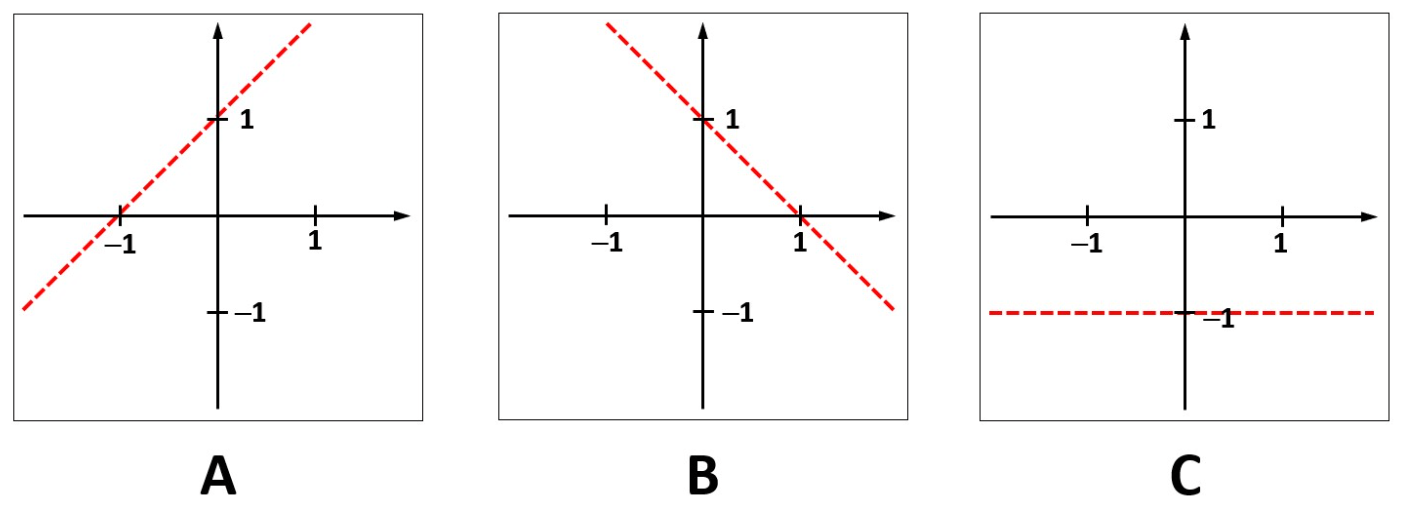

In [83]:
%env OMP_NUM_THREADS=4

env: OMP_NUM_THREADS=4


### Lösung
- A: $\beta_0$= 1 , $\beta_1$= 1
- B: $\beta_0$= 1, $\beta_1$= -1
- C: $\beta_0$= -1, $\beta_1 = 0$ 


b) Gegeben sind folgende Datenerhebungen A, B und C mit den zugehörigen Datenpunkten. Entscheiden Sie für jede Erhebung, ob eine Analyse mittels linearer Regression möglich ist und begründen Sie kurz Ihre Antwort, falls dies nicht geht.

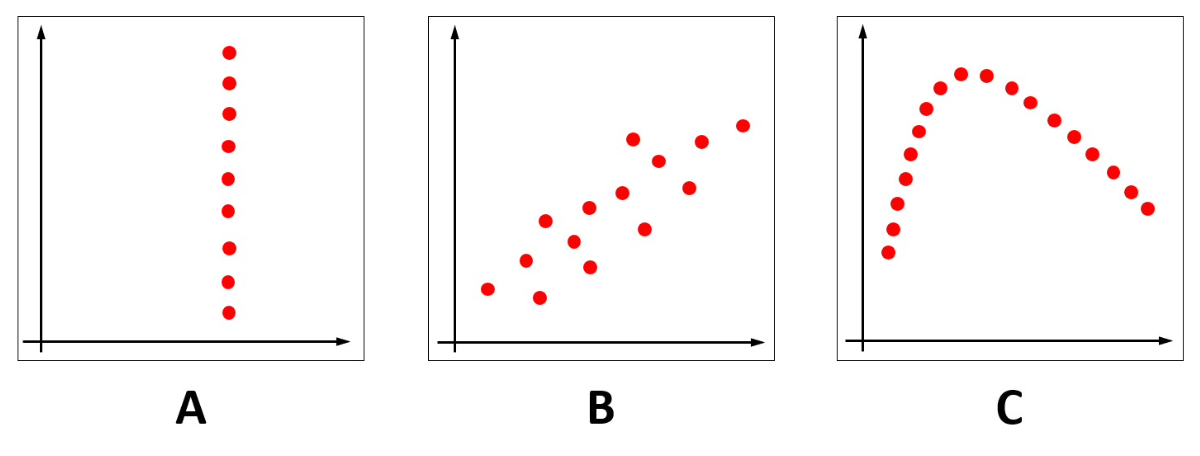

### Lösung

- A: Keine Regression möglich, da kein zusammenhang der Variablen **(Musterlösung, steigung = Unendlich)**
- B: Lineare Regression möglich 
- C: Keine Regression möglich, da kein Linearer zusammenhang **(Musterlösung $R^2$ ist tief)**

## Aufgabe 2

Der „California Housing“-Datensatz aus dem Paket sklearn.datasets beinhaltet
verschiedene Informationen aus 20.640 Haushalten in Kalifornien. Laden Sie diesen Datensatz
und nutzen Sie daraus die Spalten 2 (durchschnittliche Anzahl an Räumen) und 3
(durchschnittliche Anzahl an Schlafzimmern) für eine Regressionsanalyse. Gehen Sie dazu wie
folgt vor: 

In [1]:
# Vorbereitung Aufgabe 
from sklearn import datasets 
data = datasets.fetch_california_housing() 
data_x = data.data[:,2]
data_y = data.data[:,3] 
data_x = data_x.reshape((-1,1)) ## hinzugefügt
x_data = data_x
y_data = data_y

In [2]:
data_x

array([[6.98412698],
       [6.23813708],
       [8.28813559],
       ...,
       [5.20554273],
       [5.32951289],
       [5.25471698]])

Teilen Sie die Daten im Verhältnis 80:20 in Trainings- und Testdaten auf und führen Sie damit
eine Regressionsanalyse durch, um festzustellen, ob es einen linearen Zusammenhang
zwischen Anzahl an Räumen und Anzahl an Schlafzimmern gibt. Bestimmen Sie für den
Testdatensatz zudem den MSE sowie R2
-Wert und plotten Sie Ihre Ergebnisse in einem
Diagramm. 

### Lösung

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns  # Schönere Grafiken
import numpy as np
from sklearn.linear_model import LinearRegression as lr

In [4]:
split=int(data_x.size/100*20)
print(split)

4128


In [5]:
#split in train und test 
data_x.size
x_train = x_data[:-split]
x_test = x_data[-split:]
y_train = y_data[:-split]
y_test = y_data[-split:]

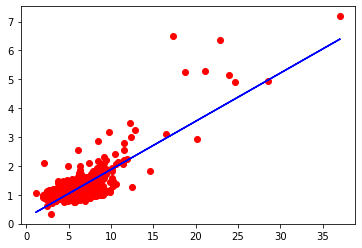

In [6]:
model = lr()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
plt.plot(x_test,y_test,'ro')
plt.plot(x_test,y_pred,'b-')
plt.show()

In [7]:
r2_score(y_test, y_pred)

0.22703839297118267

In [8]:
mse(y_test, y_pred, squared=True) 

0.053011222965721215

# Aufgabenblatt 2

## Aufgabe 1
a) Gegeben ist folgende Tabelle mit n = 12 Werten der tatsächlichen Klassifikation y und der
durch k-Nächste-Nachbarn vorhergesagten Klassifikation ŷ eines Datensatzes (Klassen 0
und 1). Bestimmen Sie die Treffsicherheit des Algorithmus. 

b) Wie gross ist demnach die Fehlinterpretationsrate (Hamming-Verlust)?
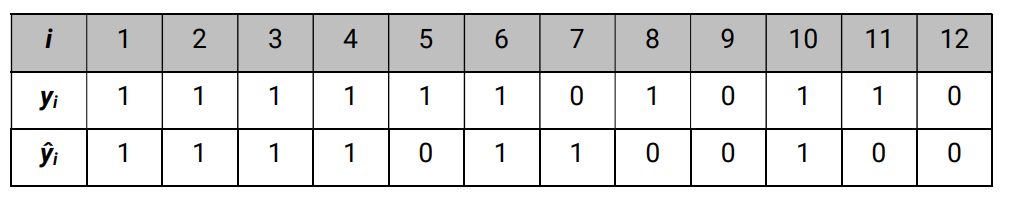

In [19]:
# a) Treffsicherheit berechnen
treffsicherheit = 1/12*(1 + 1 + 1 + 1 + 0 + 1 + 0 + 0 + 1 + 1 + 0 + 1)
print(treffsicherheit,"oder", str(treffsicherheit*100)+"%")
# b Hamming Verlust
print(1-treffsicherheit,"oder", str(((1-treffsicherheit)*100))+"%")

0.6666666666666666 oder 66.66666666666666%
0.33333333333333337 oder 33.333333333333336%


## Aufgabe 2 
Die Datei „wine.txt“ in Moodle enthält drei Spalten des zugehörigen Datensatzes aus dem
Paket sklearn.datasets. Die ersten beiden Spalten entsprechen 2D-Koordinaten (x und y),
die dritte Spalte entspricht der tatsächlichen Klassifikation der Punkte.

a) Visualisieren Sie die Datei als Streudiagramm (Scatter Plot). 

In [20]:
data = np.loadtxt("wine.txt", delimiter=",")

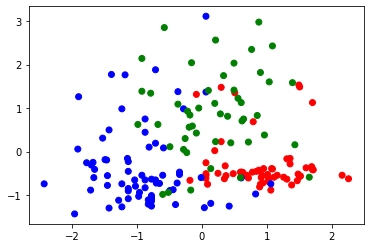

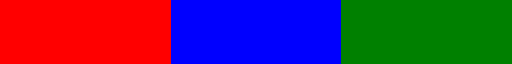

In [26]:
# Daten Plotten 
#plt.axis([10,80,0,120])
colors = ['red', 'blue', 'green'] # Array mit den beiden farben 
# Farbcodierungen in Colormap speichern 
import matplotlib.colors 
cmap = matplotlib.colors.ListedColormap(colors)
plt.scatter(data[:,0], data[:,1], c=data[:,2], cmap=cmap)
plt.show()
cmap

- b) Ermitteln Sie anhand der Ellenbogen-Methode den optimalen k-Wert für eine Clusterbildung gemäss k-Mitten-Algorithmus und zeichnen Sie die zugehörige(Trägheits)Kurve. 

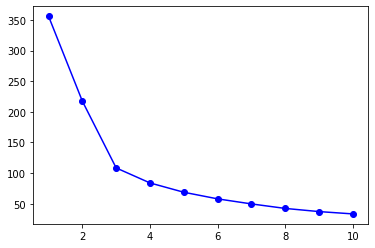

In [30]:
from sklearn.cluster import KMeans
x_data = data[:,:2] # Spalten 0 und 1 -> Koordinaten
y_data = data[:,2] # Spalte 2 -< korrekte Klassifikation
inert = []
for k in range(1,11):
    model = KMeans(k)
    model.fit(x_data)
    inert.append(model.inertia_)
x = np.linspace(1,10,10)
plt.plot(x, inert, 'b-')
plt.plot(x, inert, 'bo')
plt.show() 

Bester wert ist k = 3

- c) Bestimmen Sie für den aus b) ermittelten optimalen k-Wert eine Vorhersage (fit_predict) der Klassenzugehörigkeit aller Punkte der Datei „wine.txt“ und visualisieren Sie das Ergebnis als Streudiagramm. Wie gut stimmt die vorhergesagte Klassifikation – rein optisch betrachtet – mit dem tatsächlichen Ergebnis aus a) überein? 

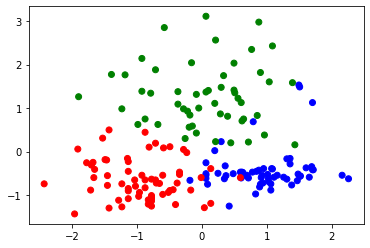

In [32]:
model = KMeans(n_clusters=3, max_iter=300)
# klassifiziere mir meine Daten 
y_pred = model.fit_predict(data)
colors = ['green', 'red', 'blue']
cmap = matplotlib.colors.ListedColormap(colors)
plt.scatter(data[:,0], data[:,1], c=y_pred, cmap=cmap)
plt.show()

# Aufgabenblatt 3

## Aufgabe 1
Gegeben sind folgende Datensätze A, B und C sowie die ersten beiden (nicht
massstabsgetreuen) Komponenten PC 1 und PC 2 einer Hauptkomponentenzerlegung.
Welche der drei Datensätze liefern mittels Principal Component Analysis beide
Hauptkomponenten? 

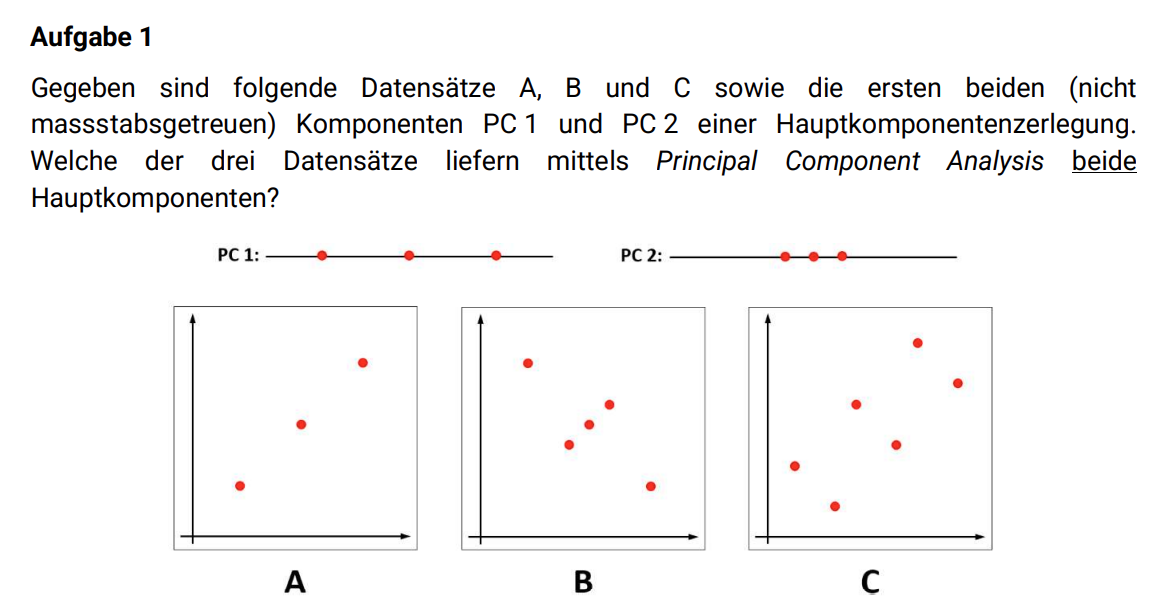

Datensatz B liefert beide Hauptkomponenten, da sich diese auf beide Achsen projezieren lässt

## Aufgabe 2
Gegeben ist folgende prozentuale Verteilung der Varianz auf die Hauptkomponenten (PC)
eines 8-dimensionalen Datensatzes gemäss Principal Component Analysis. Zeichnen Sie die 
Verteilung der Varianz in Python als kumulative Summe (d.h. aufsummiert) in ein Diagramm
(x-Achse: Hauptkomponenten; y-Achse: Varianz [%]). Überlegen Sie ausserdem, auf wie viele
Dimensionen sich der Datensatz praktisch ohne Verlust reduzieren lässt. 

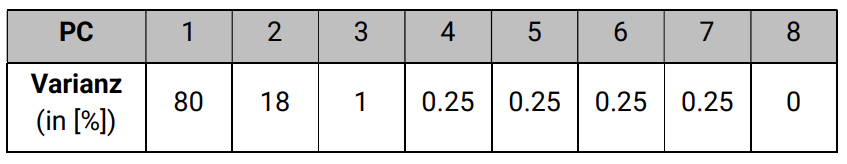

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


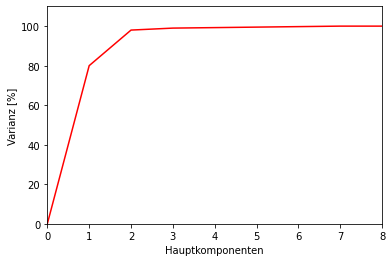

In [51]:
varianz = [0., 80., 18., 1., 0.25, 0.25, 0.25, 0.25, 0.]
#x = np.linspace(0, 8, 9) oder einfach
x = [0., 1., 2., 3., 4., 5., 6., 7., 8.]
plt.xlabel('Hauptkomponenten')
plt.ylabel('Varianz [%]') 
plt.axis([0,8,0,110]) 
plt.plot(x, np.cumsum(varianz), 'r-') 
print(x)
plt.show()

Der Datensatz lässt sich praktisch ohne Verluste auf zwei Hauptkomponenten reduzieren, da dies 98% der Varianz abdeckt (80+18)

## Aufgabe 3
Der Iris-Datensatz aus dem Paket sklearn.datasets beinhaltet 150 Schwertlilien, die nach
vier unterschiedlichen Merkmalen klassifiziert wurden. Laden Sie zunächst den Datensatz
iris, der u.a. die Teile iris.data (Grösse 150x4) mit den Merkmalswerten sowie
iris.target (Grösse 150x1) mit den korrekten Klassifikationen enthält. 

In [54]:
from sklearn import datasets
iris = datasets.load_iris() 

In [62]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

a) Führen Sie mittels PCA eine Reduktion des vierdimensionalen Merkmalraumes
(iris.data) auf zwei Dimensionen durch und visualisieren Sie das Ergebnis als
Streudiagramm (Scatter Plot). 

In [57]:
from sklearn.decomposition import PCA
model = PCA(n_components=2) # reduktion auf zwei komponenten
# Projiziere die daten gleich anhand der Projektion
data_proj = model.fit_transform(iris.data)
# data_proj hat keine x,y sondern die Projizierten koordinaten aller punkte auf der x-achse und alternativ aller punkte auf der X-achse
model.components_ # liefert die Vektoren, aber nicht transponiert 

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [70]:
iris.target.astype(float)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [59]:
np.transpose(model.components_)
np.dot(np.transpose(model.components_)[:,0],np.transpose(model.components_)[:,1]) # sollte 0 sein
model.explained_variance_ratio_ 

array([0.92461872, 0.05306648])

In [72]:
data_proj[:,0]

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978,
        1.28482569,  0.93248853,  1.46430232,  0.18331772,  1.08810326,
        0.64166908,  1.09506066, -0.74912267,  1.04413183, -0.0087454 ,
       -0.50784088,  0.51169856,  0.26497651,  0.98493451, -0.17392537,
        0.92786078,  0.66028376,  0.23610499,  0.94473373,  0.04

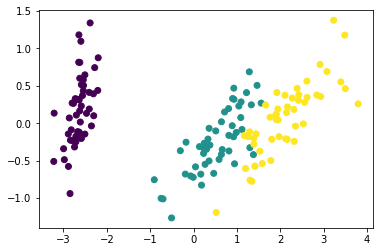

In [77]:
# Vieviel % der Information steckt entlang der jeweiligen Komponenten
#colors = ['green', 'red', 'blue']
#cmap = matplotlib.colors.ListedColormap(colors)
plt.scatter(data_proj[:,0], data_proj[:,1], c=iris.target) # plotten
plt.show()

b) Wie verteilt sich die Varianz des dimensionsreduzierten Datensatzes auf die beiden
Hauptkomponenten? Ist das ein brauchbares Ergebnis? 

In [81]:
np.sum(model.explained_variance_ratio_)

0.9776852063187949

98% der Varianz fällt auf die ersten beiden Hauptkomponenten, der Verlust ist minimal

c) Bestimmen Sie mittels k-Mitten-Algorithmus die zugehörigen Cluster der
dimensionsreduzierten Daten und visualisieren Sie das Ergebnis als Streudiagramm. Wie
gut stimmt die vorhergesagte Klassifikation – rein optisch betrachtet – mit dem
tatsächlichen Ergebnis aus a) überein? 

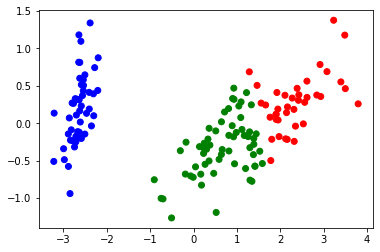

In [82]:
# Medell erzeugen (default=8, iterationsgrenze 300 )
model = KMeans(n_clusters=3, max_iter=300)
# klassifiziere mir meine Daten 
y_pred = model.fit_predict(data_proj)
colors = ['red', 'blue', 'green']
cmap = matplotlib.colors.ListedColormap(colors)
plt.scatter(data_proj[:,0], data_proj[:,1], c=y_pred, cmap=cmap)
#plt.scatter(data[:,0], data[:,1], c=y_pred)
plt.show()

Klassifikation ist nicht schlecht. Rechts wurden einige Punkte falsch zugeordnet

# Aufgabenblatt 4

## Aufgabe 1 
Gegeben sind folgende Vektoren 
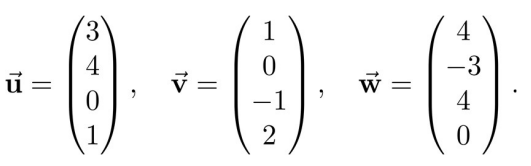
Zeigen Sie rechnerisch und mittels Python, welche Paarungen obiger Vektoren orthogonal
sind, d.h. senkrecht aufeinander stehen. 

In [84]:
u = [3,4,0,1]
v = [1,0,-1,2]
w = [4,-3,4,0]

In [91]:
print(np.dot(u, v))
print(np.dot(v, w))
print(np.dot(u, w))

5
0
0


$\vec{u}$ und $\vec{w}$, sowie $\vec{v}$ und $\vec{w}$ stehen senkrecht aufeinander, da ihre skalarprodukte null sind 

Rechnerische Lösung aus dem Aufgabenblatt (mir wahr nicht klar, was er da wollte:
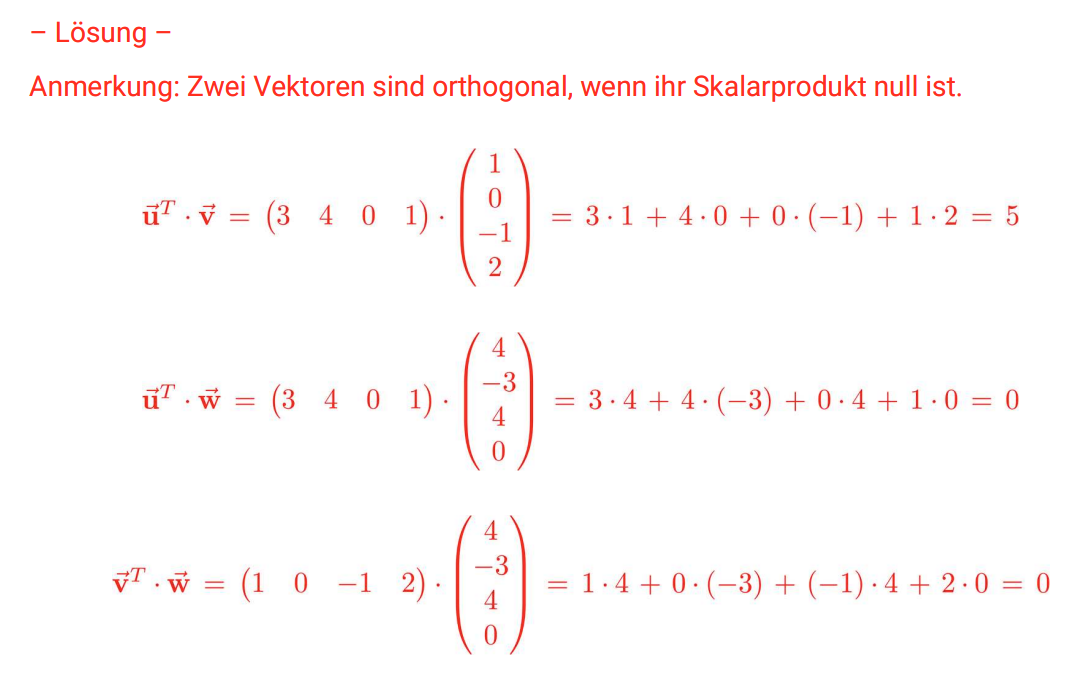

## Aufgabe 2
Gegeben ist folgende Matrix 
$$A = \left(\begin{array}{rrrr} 
3 & 0 & 4 & 1 \\ 
2 & 1 & 3 & 2 \\ 
\end{array}\right)$$

Bestimmen Sie die Transponierte $A^T$ und prüfen Sie Ihr Ergebnis mittels Python. 

In [102]:
a = [3,0,4,1,2,1,3,2]
a = np.reshape(a,(2,4))
a

array([[3, 0, 4, 1],
       [2, 1, 3, 2]])

Transponierte $A^T$: 
$$A^T = \left(\begin{array}{rr} 
3 & 2 \\
0 & 1 \\ 
4 & 3 \\
1 & 2 \\ 
\end{array}\right)$$

In [103]:
a_t = np.transpose(a)
a_t

array([[3, 2],
       [0, 1],
       [4, 3],
       [1, 2]])

b) Welche Dimension benötigt ein Vektor $\vec{v}$ für die Matrix-Vektor-Multiplikation $A\cdot \vec{v}$ und $A^T\cdot \vec{v}$ für vorbezeichnete Matrix? In welchem der beiden Fälle erfolgt eine
Dimensionsreduktion bzw. eine Dimensionserhöhung? 

- Für $A\cdot \vec{v}$ benötigt der Vektor eine Dimension von 4, es erfolgt eine Dimensionsreduktion
- Für $A^T\cdot \vec{v}$ benötigt der Vektor eine Dimension von 2, es erfolgt eine Dimensionserhöhung

c) Gegeben sind folgende Vektoren:
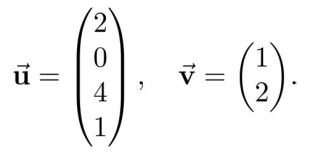

Berechnen Sie mittels Python die beiden Matrix-Vektor-Multiplikationen $A\cdot \vec{u}$ und $A^T\cdot \vec{v}$
[Zur Übung können Sie die beiden Matrix-Vektor-Multiplikationen auch selbst berechnen.] 

In [111]:
u = [2,0,4,1]
v = [1,2]

In [112]:
np.dot(a, u)

array([23, 18])

In [113]:
np.dot(a_t, v)

array([ 7,  2, 10,  5])

## Aufgabe 3
Gegeben sind folgende Vektoren 
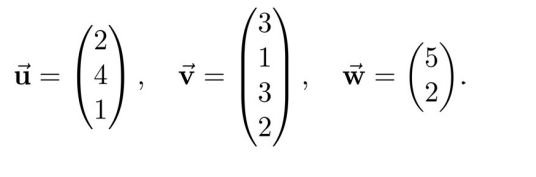
a) Berechnen Sie das dyadische Produkt und kontrollieren Sie Ihr Ergebnis in Python
auf *zwei unterschiedliche* Arten. 

In [118]:
u = np.transpose([2,4,1])
v = np.transpose([3,1,3,2])
w = np.transpose([5,2])
u

array([2, 4, 1])

In [122]:
np.outer(u,v)

array([[ 6,  2,  6,  4],
       [12,  4, 12,  8],
       [ 3,  1,  3,  2]])

In [125]:
np.einsum('i,j->ij',u,v) 

array([[ 6,  2,  6,  4],
       [12,  4, 12,  8],
       [ 3,  1,  3,  2]])